# Part 1



## Data in a Structure

In [1]:
pip install pandas

In [2]:
pip install matplotlib

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv('/content/drive/MyDrive/Northeastern/Copy of correct_twitter_202102.tsv', sep='\t')


<ipython-input-21-bb8211645cff>:1: DtypeWarning: Columns (0,4,5,7,8,9,10,11,12,13,20,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Northeastern/Copy of correct_twitter_202102.tsv', sep='\t')


In [22]:
df.head()

id           event                               ts1  \
0  1358322479136178177  britney_202102  2022-03-01 09:06:52.403595-05:00   
1  1358323016736796677  britney_202102  2022-01-05 08:34:04.477789-05:00   
2  1358322996696465409  britney_202102  2022-03-01 09:06:52.399008-05:00   
3  1358322976769286151  britney_202102  2022-03-01 09:06:52.399205-05:00   
4  1368923802260889606  britney_202102  2022-03-01 07:26:05.505986-05:00   

                                ts2 from_stream directly_from_stream  \
0  2022-03-01 09:06:52.403595-05:00        True                 True   
1  2022-03-01 09:06:52.398778-05:00        True                 True   
2  2022-03-01 09:06:52.399008-05:00        True                 True   
3  2022-03-01 09:06:52.399205-05:00        True                 True   
4  2022-03-01 07:26:05.505986-05:00        True                 True   

   from_search directly_from_search from_quote_search  \
0        False                False             False   
1        False                False             False   
2        False                False             False   
3        False                False             False   
4        False                False             False   

  directly_from_quote_search  ...     retweeted retweeted_author_id  \
0                      False  ...  1.358249e+18        9.325937e+07   
1                      False  ...  1.358189e+18        1.752517e+07   
2                      False  ...  1.358201e+18        4.035766e+08   
3                      False  ...  1.358238e+18        4.429004e+09   
4                      False  ...           NaN                 NaN   

  retweeted_handle retweeted_follower_count mentioned_author_ids  \
0      briebxrries                   1002.0                  NaN   
1          Variety                2669599.0                  NaN   
2      Johnnerkell                   2650.0                  NaN   
3         PopCrave                 880695.0                  NaN   
4              NaN                      NaN                  NaN   

  mentioned_handles            hashtags urls media_keys  place_id  
0               NaN                 NaN  NaN        NaN       NaN  
1               NaN     ['FreeBritney']  NaN        NaN       NaN  
2               NaN                 NaN  NaN        NaN       NaN  
3               NaN  ['FramingBritney']  NaN        NaN       NaN  
4               NaN                 NaN  NaN        NaN       NaN  

[5 rows x 46 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845730 entries, 0 to 845729
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             845730 non-null  object 
 1   event                          845730 non-null  object 
 2   ts1                            845730 non-null  object 
 3    ts2                           845730 non-null  object 
 4   from_stream                    845730 non-null  object 
 5   directly_from_stream           845730 non-null  object 
 6   from_search                    845730 non-null  bool   
 7   directly_from_search           845730 non-null  object 
 8   from_quote_search              845730 non-null  object 
 9   directly_from_quote_search     845730 non-null  object 
 10  from_convo_search              845730 non-null  object 
 11  directly_from_convo_search     845730 non-null  object 
 12  from_timeline_search          

In [24]:
# Convert date/time columns
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['ts1'] = pd.to_datetime(df['ts1'], errors='coerce')
df[' ts2'] = pd.to_datetime(df[' ts2'], errors='coerce')

# Ensure boolean columns are correctly parsed
boolean_columns = [
    'from_stream', 'directly_from_stream', 'from_search', 'directly_from_search',
    'from_quote_search', 'directly_from_quote_search', 'from_convo_search',
    'directly_from_convo_search', 'from_timeline_search', 'directly_from_timeline_search',
    'possibly_sensitive'
]
for col in boolean_columns:
    df[col] = df[col].astype(bool)

# Ensure numeric columns are correctly parsed as float
numeric_columns = [
    'author_id', 'conversation_id', 'author_follower_count', 'retweet_count',
    'reply_count', 'like_count', 'quote_count', 'replied_to', 'replied_to_author_id',
    'replied_to_follower_count', 'quoted', 'quoted_author_id', 'quoted_follower_count',
    'retweeted', 'retweeted_author_id', 'retweeted_follower_count', 'mentioned_author_ids',
    'mentioned_handles'
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ensure text/categorical columns are correctly parsed as object
text_columns = [
    'text', 'lang', 'author_handle', 'reply_settings', 'source', 'replied_to_handle',
    'quoted_handle', 'retweeted_handle', 'hashtags', 'urls', 'media_keys', 'place_id'
]
for col in text_columns:
    df[col] = df[col].astype(str)

# Verify changes
df.dtypes


<ipython-input-24-d80f2d0f92c1>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


id                                                  object
event                                               object
ts1                              datetime64[ns, UTC-05:00]
 ts2                             datetime64[ns, UTC-05:00]
from_stream                                           bool
directly_from_stream                                  bool
from_search                                           bool
directly_from_search                                  bool
from_quote_search                                     bool
directly_from_quote_search                            bool
from_convo_search                                     bool
directly_from_convo_search                            bool
from_timeline_search                                  bool
directly_from_timeline_search                         bool
text                                                object
lang                                                object
author_id                                          float64
author_handle                                       object
created_at                                          object
conversation_id                                    float64
possibly_sensitive                                    bool
reply_settings                                      object
source                                              object
author_follower_count                              float64
retweet_count                                      float64
reply_count                                        float64
like_count                                         float64
quote_count                                        float64
replied_to                                         float64
replied_to_author_id                               float64
replied_to_handle                                   object
replied_to_follower_count                          float64
quoted                                             float64
quoted_author_id                                   float64
quoted_handle                                       object
quoted_follower_count                              float64
retweeted                                          float64
retweeted_author_id                                float64
retweeted_handle                                    object
retweeted_follower_count                           float64
mentioned_author_ids                               float64
mentioned_handles                                  float64
hashtags                                            object
urls                                                object
media_keys                                          object
place_id                                            object
dtype: object

In [25]:
# Ensure 'created_at' is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Check for any nulls after conversion
null_dates = df['created_at'].isnull().sum()
print(f"Number of null values in 'created_at' after conversion: {null_dates}")

# Drop rows where 'created_at' could not be converted
df = df.dropna(subset=['created_at'])



Number of null values in 'created_at' after conversion: 86312


#### Filter the Data for the Term

In [26]:
def filter_data_by_term(df, term):
    """Filter the DataFrame for rows containing the specified term in the 'text' column."""
    filtered_df = df[df['text'].str.contains(term, case=False, na=False)]
    return filtered_df

# Example usage: term 'music'
term = 'music'
filtered_df = filter_data_by_term(df, term)


# Part 2

## Construct functionality

#### 1. How many tweets were posted containing the term on each day?

In [27]:
def tweets_per_day(filtered_df):
    """Count the number of tweets containing the term per day."""
    tweets_per_day_count = filtered_df.groupby(filtered_df['created_at'].dt.date).size()
    return tweets_per_day_count

# Get the count of tweets per day
tweets_per_day_count = tweets_per_day(filtered_df)
print(tweets_per_day_count)


created_at
2021-01-01      77
2021-01-02     205
2021-01-03     134
2021-01-04      74
2021-01-05      98
              ... 
2021-03-10     162
2021-03-11    1006
2021-03-12    3860
2021-03-13     240
2021-03-14      15
Length: 73, dtype: int64


#### 2. How many unique users posted a tweet containing the term?

In [28]:
def unique_users_count(filtered_df):
    """Count the number of unique users who posted tweets containing the term."""
    unique_users = filtered_df['author_id'].nunique()
    return unique_users

# Get the count of unique users
unique_users = unique_users_count(filtered_df)
print(f"Number of unique users: {unique_users}")


Number of unique users: 22507


#### 3. How many likes did tweets containing the term get, on average?

In [29]:
def average_likes(filtered_df):
    """Calculate the average number of likes for tweets containing the term."""
    avg_likes = filtered_df['like_count'].mean()
    return avg_likes

# Get the average number of likes
avg_likes = average_likes(filtered_df)
print(f"Average number of likes: {avg_likes:.2f}")


Average number of likes: 81.30


#### 4. Where (in terms of place IDs) did the tweets come from?

In [30]:
def place_ids_list(filtered_df):
    """List unique place IDs from where the tweets containing the term were posted."""
    place_ids = filtered_df['place_id'].dropna().unique()
    return place_ids

# Get the list of place IDs
place_ids = place_ids_list(filtered_df)
print(f"Place IDs: {place_ids}")


Place IDs: ['nan' 'a84b808ce3f11719' 'dd3b100831dd1763' '4dad272dba156a02'
 '67687709552688fe' '3b77caf94bfc81fe' 'fbcefe96d630085b'
 '011a05612b6a331c' '3448f4f82d2187bc' 'a592bd6ceb1319f7'
 '19ad277db0586bb7' '5c2b5e46ab891f07' '75965f8c6ee9a4b0'
 'fbd6d2f5a4e4a15e' '7cb7440bcf83d464' '9c1c0a45346f5837'
 'e81d7291bd2ba45e' 'ea679934779f45c7' '4ec01c9dbc693497'
 '0a7dc9891a02c366' 'fa3435044b52ecc7' '5c62ffb0f0f3479d'
 '011add077f4d2da3' '00dba980404fa58a' '2335250557ea3fb4'
 '300bcc6e23a88361' '48ad377ff2ff9e51' 'c0b8e8dc81930292'
 '5d058f2e9fe1516c' '38d5974e82ed1a6c' '59612bd882018c51'
 'e4a0d228eb6be76b' 'dc234665a759a05d' '7dde0febc9ef245b'
 '9807c5c5f7a2c6ce' '0509a6acb3d27ec4' '25ddf20e1bfb00ea'
 '3f871475c095f94f' '002e24c6736f069d' '6e276f099bcab5b5'
 '5a110d312052166f' '7dea5f8c907d1ea2' 'c8022ca5114d7ea9'
 '1df98ab7679917e7' 'fa8e38be72982a5a' '0112bdb03ace5ee9'
 'a612c69b44b2e5da' 'efb544e303ed138c' 'd13775d10c08f835'
 'b49b3053b5c25bf5' '3b98b02fba3f9753' '4393349f368f67a

#### 5. What times of day were the tweets posted at?


In [31]:
def tweets_by_hour(filtered_df):
    """Analyze the times of day when tweets containing the term were posted."""
    filtered_df['hour'] = filtered_df['created_at'].dt.hour
    tweets_by_hour_count = filtered_df['hour'].value_counts().sort_index()
    return tweets_by_hour_count

# Get the distribution of tweets by hour
tweets_by_hour_count = tweets_by_hour(filtered_df)
print(tweets_by_hour_count)


hour
0      911
1      701
2      583
3     1059
4      898
5      710
6      809
7      938
8     1019
9     1082
10    1554
11    1649
12    1544
13    1323
14    1205
15    1518
16    1495
17    1792
18    1543
19    1377
20    1293
21    1246
22    1097
23    1046
Name: count, dtype: int64


<ipython-input-31-03331c1a19e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour'] = filtered_df['created_at'].dt.hour


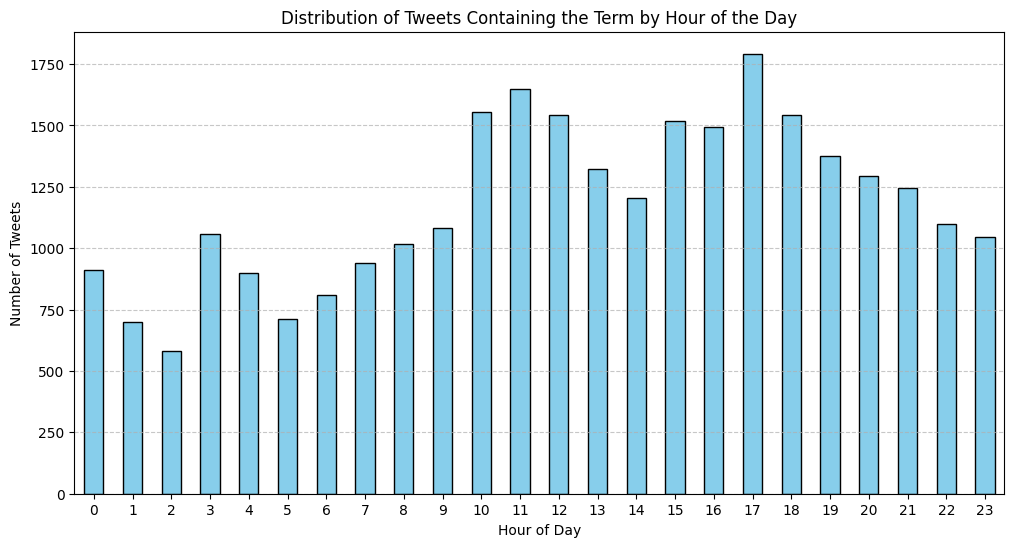

In [32]:
def plot_tweets_by_hour(tweets_by_hour_count):
    """Plot the distribution of tweets by hour of the day."""
    plt.figure(figsize=(12, 6))
    tweets_by_hour_count.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Tweets Containing the Term by Hour of the Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot the distribution of tweets by hour
plot_tweets_by_hour(tweets_by_hour_count)


##### 6. Which user posted the most tweets containing the term?


In [33]:
def most_active_user(filtered_df):
    """Identify the user who posted the most tweets containing the term."""
    # Convert the user ID to integer to avoid scientific notation
    most_active_user_id = filtered_df['author_id'].value_counts().idxmax()
    most_active_user_count = filtered_df['author_id'].value_counts().max()
    return int(most_active_user_id), most_active_user_count

# Get the most active user and the number of tweets they posted
most_active_user_id, most_active_user_count = most_active_user(filtered_df)
print(f"Most active user ID: {most_active_user_id} with {most_active_user_count} tweets")


Most active user ID: 711826025349517312 with 172 tweets
